## 1

The classification problem is to predict whether a patient has heart disease (binary outcome: 1 = presence, 0 = absence) based on 13 clinical features such as age, sex, chest pain type, and cholesterol levels, this is a binary classification task.

## 2

We may have to apply the standardization transformation for numeric features, like age, trestbps, chol, thalach, and oldpeak have different scales. Standardizing these ensures classifiers like Logistic Regression or SVM are not biased by scale differences. Because standardization improves model convergence and performance for distance-based or gradient-based algorithms.

## 3

In [20]:
import numpy as np
import pandas as pd
heart = pd.read_csv("https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:
heart.shape

(303, 14)

In [4]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


The dataset contains 303 observations and 14 variables, it is related to heart disease diagnosis, including demographic, clinical, and diagnostic measurements. Most variables are numeric, with age, trestbps, chol, and thalach as continuous or discrete numeric features, while variables like sex, cp, fbs, and restecg are categorical integers. The target variable num indicates heart disease presence (0 = no disease; 1–4 = increasing severity). 

## 4

In [21]:
heart['num_binary'] = heart['num'].apply(lambda x: 1 if x >= 1 else 0)
heart['num_binary'].value_counts()

num_binary
0    164
1    139
Name: count, dtype: int64

## 5

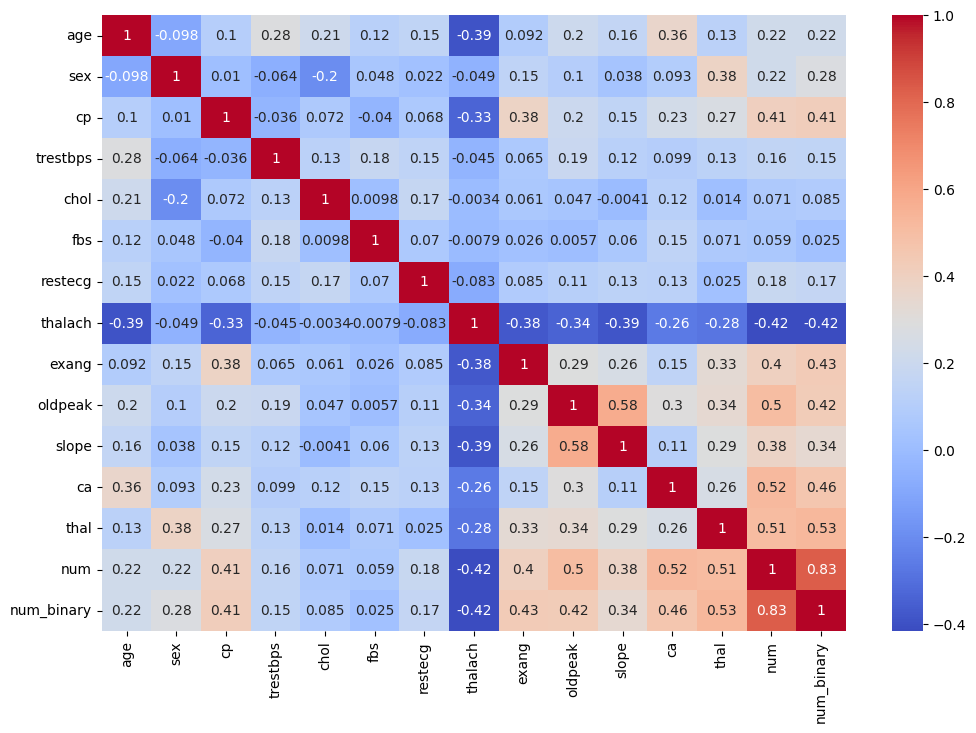

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = heart.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The target variable num_binary shows strong positive correlations with thal (0.53), ca (0.46), and oldpeak (0.42), and a strong negative correlation with thalach (-0.42), suggesting these features are informative for classification. 

## 6

In [10]:
heart.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
num_binary    0
dtype: int64

In [25]:
heart_clean = heart.dropna()
print(f"Observations after dropping missing values: {heart_clean.shape[0]}.")

Observations after dropping missing values: 297.


## 7

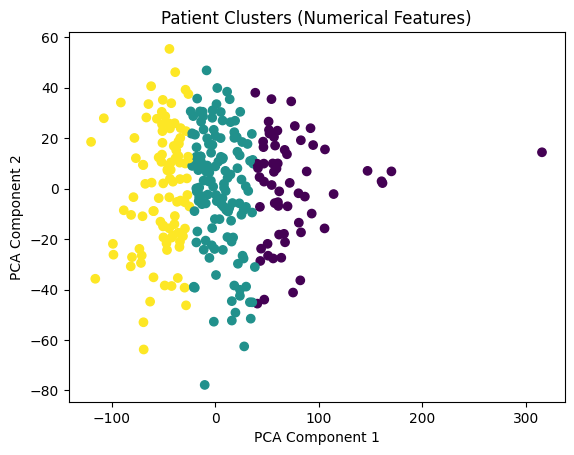

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
heart_clean = heart_clean.copy()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_num = heart_clean[numerical_cols].copy()
kmeans = KMeans(n_clusters=3, random_state=1)
heart_clean['cluster'] = kmeans.fit_predict(X_num)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_num)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=heart_clean['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Patient Clusters (Numerical Features)')
plt.show()

## 8


In [33]:
from sklearn.model_selection import train_test_split
X = heart_clean.drop(['num', 'num_binary', 'cluster'], axis=1)
y = heart_clean['num_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 207 samples
Test set: 90 samples


## 9

I will use the following two classifiers:

- Logistic Regression: because it is itnterpretable, the coefficients show feature effects, ideal for clinical insights. Suitable for binary outcomes with standardized data.

- Decision Tree: because it is interpretable via tree structure, showing decision rules. 

## 10

I will specify two metrics: Area Under the ROC Curve (AUC-ROC) and F1 Score.

AUC-ROC measures the classifier’s ability to distinguish between the positive and negative classes across all classification thresholds. The Area Under the Curve is computed as the integral of the ROC curve. It ranges from 0.5  to 1.0.

The F1 Score is the harmonic mean of precision and recall, emphasizing a balance between correctly identifying heart disease cases and minimizing false positives, F1 = 2 * (Precision * Recall) / (Precision + Recall)

## 11

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Logistic Regression
lr_param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
lr = LogisticRegression(random_state=1)
lr_grid = GridSearchCV(lr, lr_param_grid, cv=5, scoring='roc_auc')
lr_grid.fit(X_train, y_train)
print("Logistic Regression Params:", lr_grid.best_params_)

# Decision Tree
dt_param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)
print("Decision Tree Params:", dt_grid.best_params_)